In [ ]:
import numpy as np

Yokoso, watashi no Knapsack Projecto...


In [2]:
class Item():
    profit = 0
    weight = 0
    def __init__(self, profit, weight):
        self.weight = weight
        self.profit = profit
    def setProfit(self,p):
        self.profit=p
    def setWeight(self,w):
        self.weight = w
    def show_item(self):
        print("Profit: ",self.profit," Weight: ",self.weight)

class Knapsack():
    def __init__(self):
        self.capacity = 0
        self.nbItems = 0
        self.items = []
    def setNbItems(self,nb):
        self.nbItems = nb
    def setCapacity(self,cap):
        self.capacity = cap
    def addItem(self,profit, weight):
        self.items.append(Item(profit,weight))  
    


In [3]:

# Read the data
def read_data(filename):
    f = open(filename, "r")
    lines = f.readlines()
    knapsack = Knapsack()
    nbItemLine = lines[3].strip().split()
    knapsack.setNbItems(int(nbItemLine[1]))
    capacityLine = lines[4].strip().split()
    knapsack.setCapacity(int(capacityLine[1]))
    data = lines[7:]
    for line in data:
        values = line.strip().split()
        knapsack.addItem(int(values[1]), int(values[2]))
    f.close()
    return knapsack

knapsack = read_data("Data/pi-12-10000-1000-001.kna")
        
for elem in knapsack.items:
        elem.show_item()

print("Nb Items: ", knapsack.nbItems)
print("Capacity: ", knapsack.capacity)



Profit:  582  Weight:  582
Profit:  194  Weight:  194
Profit:  679  Weight:  679
Profit:  485  Weight:  485
Profit:  312  Weight:  396
Profit:  873  Weight:  873
Profit:  468  Weight:  594
Profit:  208  Weight:  264
Profit:  364  Weight:  462
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  291  Weight:  291
Profit:  104  Weight:  132
Profit:  520  Weight:  660
Profit:  416  Weight:  528
Profit:  970  Weight:  970
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  364  Weight:  462
Profit:  776  Weight:  776
Profit:  194  Weight:  194
Profit:  468  Weight:  594
Profit:  970  Weight:  970
Profit:  312  Weight:  396
Profit:  260  Weight:  330
Profit:  156  Weight:  198
Profit:  485  Weight:  485
Profit:  416  Weight:  528
Profit:  364  Weight:  462
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  468  Weight:  594
Profit:  679  Weight:  679
Profit:  52  Weight:  66
Profit:  156  Weight:  198
Profit:  312  Weight:  396
Pro

In [4]:
import random
def generateRandomSolution(SAD):
    sol = [0]*SAD.nbItems # Initialise une solution avec des 0
    poids_total = 0
    valeur_total = 0

    indices = np.random.permutation(SAD.nbItems)  
    
    if SAD.nbItems == 100:
        probabiliterAjout = 0.99
    else : 
        probabiliterAjout = 0.999

    for idx in indices:
        if random.random() >= probabiliterAjout:  
            if poids_total + SAD.items[idx].weight <= SAD.capacity: 
                sol[idx] = 1
                poids_total += SAD.items[idx].weight
                valeur_total += SAD.items[idx].profit
    print("valeur initial", valeur_total,"poids initial solution", poids_total)
    return sol, valeur_total, poids_total

def find_best_neighbor(solution,value,weight,knapsack,tabuList):
    best_solution ,best_move,max_value = [0]*knapsack.nbItems,-1,-1
    max_weight = weight
    for i in range(len(solution)):
        if i not in tabuList:
            neighbor = solution[:]
            neighbor[i] = 1 - neighbor[i]
            item = knapsack.items[i]
            neighborValue = value + item.profit if neighbor[i] == 1 else value - item.profit
            neighborWeight = weight + item.weight if neighbor[i] == 1 else weight - item.weight
            if neighborWeight<=knapsack.capacity :
                if neighborValue>max_value  or best_solution is None:
                    best_solution = neighbor[:]
                    best_move = i
                    max_value = neighborValue
                    max_weight = neighborWeight
    return (best_solution,best_move,max_value,max_weight)

def tabu_search(initialSolution,solutionValue,solutionWeight,knapsack, max_iterations, tabu_size):
    best_solution,best_solution_value, bestSolutionWeight = initialSolution,solutionValue,solutionWeight  # Meilleure solution trouvée
    
    tabu_list = [] 

    current_solution = best_solution [:]
    current_value = best_solution_value
    current_weight = bestSolutionWeight
    solutionsList=[]
    
    for _ in range(max_iterations):

        bestVoisin, move,value,weight = find_best_neighbor(current_solution,current_value,current_weight,knapsack,tabu_list)

        delta_f = value - best_solution_value

        current_solution = bestVoisin[:]
        current_value, current_weight = value, weight
        # Ajouter à la liste taboue si la solution ne s'améliore pas
        if delta_f <= 0 and move != -1:
            tabu_list.append(move)
            if len(tabu_list) > tabu_size:
                tabu_list.pop(0)

        # Mise à jour de la meilleure solution
        if value > best_solution_value:
            best_solution = bestVoisin[:]
            best_solution_value = value
            bestSolutionWeight = weight

        
        solutionsList.append(best_solution_value)

    return best_solution, best_solution_value, bestSolutionWeight,solutionsList


In [5]:
import math
def select_random_neighbor(initialSolution,initialValue,initialWeight,knapsack):
    # cette fonction selectionne un voisin aléatoire à partir de la solution initiale
    neighbor = initialSolution[:]
    idx = random.randint(0, len(neighbor)-1)
    neighborWeight = initialWeight + knapsack.items[idx].weight if neighbor[idx] == 0 else initialWeight - knapsack.items[idx].weight
    while(neighborWeight > knapsack.capacity):
        idx = random.randint(0, len(neighbor)-1)
        neighborWeight = initialWeight + knapsack.items[idx].weight if not neighbor[idx] else initialWeight - knapsack.items[idx].weight
    neighbor[idx] = 1 - neighbor[idx]
    neighborValue = initialValue + knapsack.items[idx].profit if neighbor[idx] else initialValue - knapsack.items[idx].profit
    return neighbor, neighborValue,neighborWeight

def recuit_simule(initialSolution,solutionValue,solutionWeight,knapsack,t0,n1=30,n2=30,mu=0.85):
    best_solution = initialSolution[:]
    best_solution_value = solutionValue
    best_solution_weight = solutionWeight

    solutionsList = [best_solution_value]

    current_solution = initialSolution[:]
    current_solution_value = solutionValue
    current_solution_weight = solutionWeight
    print("sol : ",initialSolution)
    for k in range(n1):
        for l in range(1,n2):
            neighbor, neighborValue, neighborWeight = select_random_neighbor(current_solution, current_solution_value, current_solution_weight, knapsack)
            delta_f = current_solution_value - neighborValue 
            if delta_f <= 0 :
                current_solution, current_solution_value, current_solution_weight = neighbor[:], neighborValue, neighborWeight
                if current_solution_value > best_solution_value :
                    best_solution, best_solution_value, best_solution_weight = current_solution[:], current_solution_value, current_solution_weight
            else :
                p = random.random()
                probability = math.exp(-delta_f/ t0)
                if probability >= p :
                    current_solution, current_solution_value, current_solution_weight = neighbor[:], neighborValue, neighborWeight
                else :
                    current_solution, current_solution_value, current_solution_weight = best_solution[:], best_solution_value, best_solution_weight
            solutionsList.append(best_solution_value)
        t0 = t0 * mu
    return best_solution, best_solution_value, best_solution_weight,solutionsList

In [70]:
%%time
knapsack = read_data("Data/pi-13-10000-1000-001.kna")
initialSolution,solutionValue,solutionWeight = generateRandomSolution(knapsack)

best_solution, best_value, weight, solutionsList = recuit_simule(initialSolution,solutionValue,solutionWeight,knapsack, 500)

print("Recuit Simulé")
print("Best solution:", best_solution)

print("Best value:", best_value)

print("weight:", weight)


valeur initial 6084 poids initial solution 4724
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
%%time
import matplotlib.pyplot as plt
knapsack1 = read_data("Data/pi-15-100-1000-001.kna")

max_iterations = 1000
tabu_size = 20
initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack1)

best_solution, best_value, weight,solutionsList1 = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack1, max_iterations, tabu_size)

print("Best solution:", best_solution)
print("Best value:", best_value)
print("weight:", weight)


valeur initial 0 poids initial solution 0
Best solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best value: 999
weight: 997
CPU times: total: 188 ms
Wall time: 587 ms


In [48]:
%%time
import matplotlib.pyplot as plt
knapsack1 = read_data("Data/pi-13-10000-1000-001.kna")

max_iterations = 100
tabu_size = 20
initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack1)

best_solution, best_value, weight,solutionsList1 = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack1, max_iterations, tabu_size)
print("Méthode Tabou")
print("Best solution:", best_solution)
print("Best value:", best_value)
print("weight:", weight)

valeur initial 3120 poids initial solution 2320
Méthode Tabou
Best solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
%%time
import matplotlib.pyplot as plt
knapsack1 = read_data("Data/pi-15-10000-1000-001.kna")

max_iterations = 100
tabu_size = 20
initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack1)

best_solution, best_value, weight,solutionsList1 = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack1, max_iterations, tabu_size)


print("Best solution:", best_solution)
print("Best value:", best_value)
print("weight:", weight)

valeur initial 7245 poids initial solution 7232
Best solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

valeur initial 582 poids initial solution 582
valeur initial 468 poids initial solution 388
valeur initial 0 poids initial solution 0
Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best value pi-12: 970
weight1: 970
Best value pi-13: 1170
weight2: 970
Best value pi-15: 999
weight3: 997


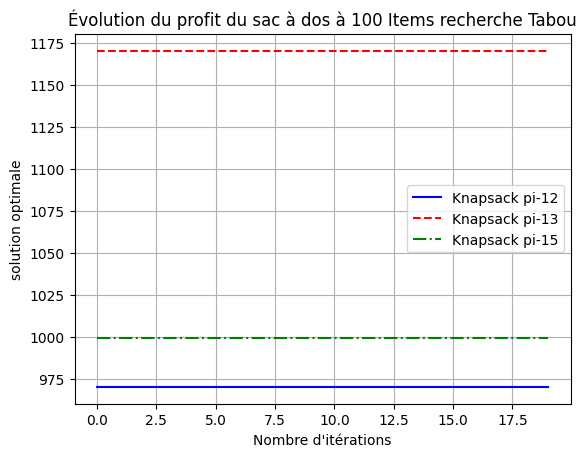

In [10]:
knapsack1 = read_data("Data/pi-12-100-1000-001.kna")
knapsack2 = read_data("Data/pi-13-100-1000-001.kna")
knapsack3 = read_data("Data/pi-15-100-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)


max_iterations = 20
tabu_size = 5

best_solution, best_value12, weight1,solutionsList1 = tabu_search(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1, max_iterations, tabu_size)
best_solution, best_value13, weight2,solutionsList2 = tabu_search(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, max_iterations, tabu_size)
best_solution, best_value15, weight3,solutionsList3 = tabu_search(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, max_iterations, tabu_size)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 100 Items recherche Tabou")
plt.legend()
plt.grid()
plt.show()

sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best solution : [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

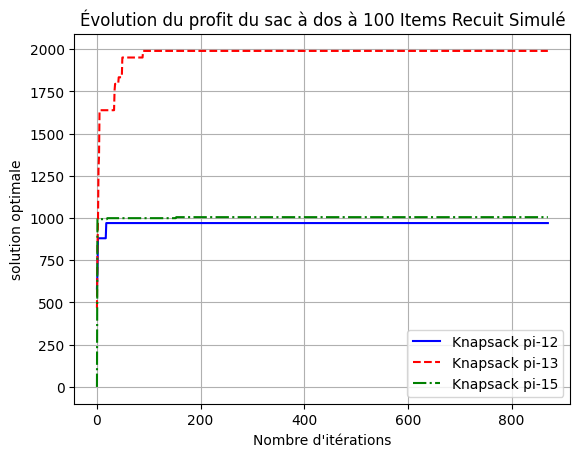

In [11]:
best_solution, best_value12, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000)
best_solution, best_value13, weight2,solutionsList2 = recuit_simule(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, 1000)
best_solution, best_value15, weight3,solutionsList3 = recuit_simule(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, 1000)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 100 Items Recuit Simulé")
plt.legend()
plt.grid()
plt.show()

sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

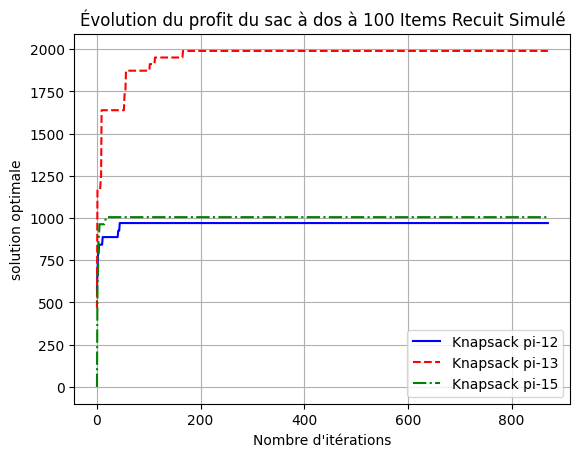

In [12]:
best_solution, best_value12, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000)
best_solution, best_value13, weight2,solutionsList2 = recuit_simule(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, 1000)
best_solution, best_value15, weight3,solutionsList3 = recuit_simule(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, 1000)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 100 Items Recuit Simulé")
plt.legend()
plt.grid()
plt.show()

valeur initial 52 poids initial solution 66
valeur initial 1053 poids initial solution 873
valeur initial 0 poids initial solution 0
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

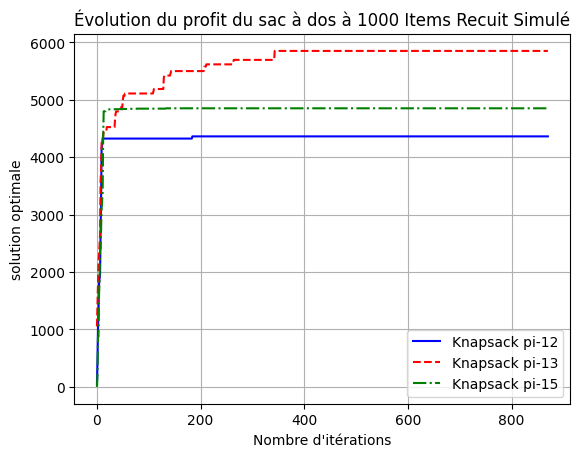

In [13]:
knapsack1 = read_data("Data/pi-12-1000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-1000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-1000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution, best_value12, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000)
best_solution, best_value13, weight2,solutionsList2 = recuit_simule(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, 1000)
best_solution, best_value15, weight3,solutionsList3 = recuit_simule(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, 1000)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 1000 Items Recuit Simulé")
plt.legend()
plt.grid()
plt.show()


Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

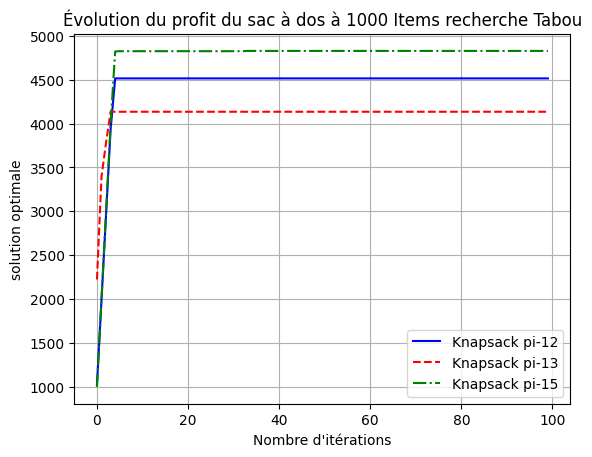

In [14]:



max_iterations = 100
tabu_size = 5

best_solution, best_value12, weight1,solutionsList1 = tabu_search(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1, max_iterations, tabu_size)
best_solution, best_value13, weight2,solutionsList2 = tabu_search(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, max_iterations, tabu_size)
best_solution, best_value15, weight3,solutionsList3 = tabu_search(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, max_iterations, tabu_size)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 1000 Items recherche Tabou")
plt.legend()
plt.grid()
plt.show()

valeur initial 2184 poids initial solution 2772
valeur initial 5655 poids initial solution 4315
valeur initial 7032 poids initial solution 7015
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

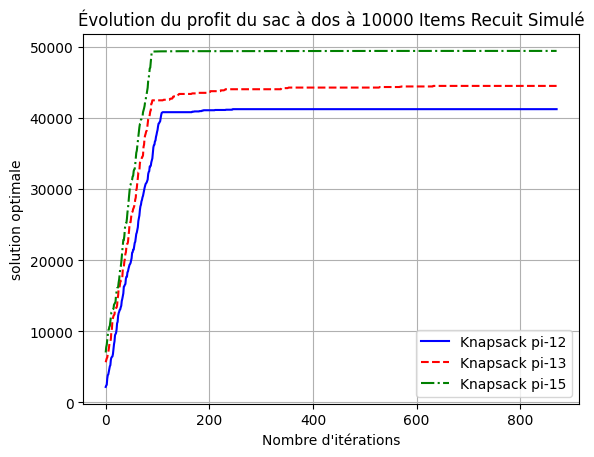

In [15]:
knapsack1 = read_data("Data/pi-12-10000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-10000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution, best_value12, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000)
best_solution, best_value13, weight2,solutionsList2 = recuit_simule(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, 1000)
best_solution, best_value15, weight3,solutionsList3 = recuit_simule(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, 1000)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items Recuit Simulé")
plt.legend()
plt.grid()
plt.show()


valeur initial 4474 poids initial solution 5104
valeur initial 3198 poids initial solution 2158
valeur initial 6465 poids initial solution 6454
Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

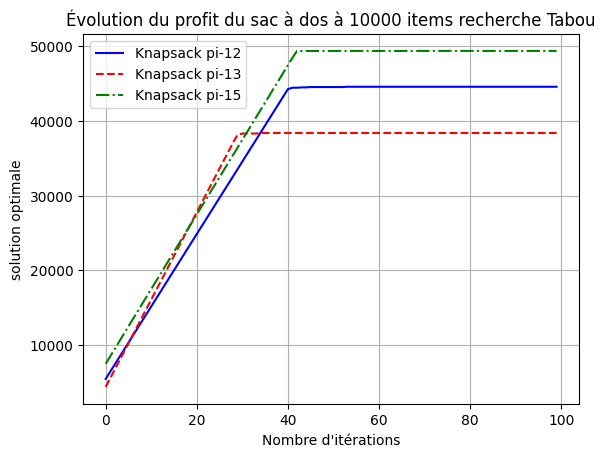

In [16]:
knapsack1 = read_data("Data/pi-12-10000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-10000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)


max_iterations = 100
tabu_size = 5

best_solution, best_value12, weight1,solutionsList1 = tabu_search(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1, max_iterations, tabu_size)
best_solution, best_value13, weight2,solutionsList2 = tabu_search(initial_solution2, initial_solution_value2, initialSolutionWeight2,knapsack2, max_iterations, tabu_size)
best_solution, best_value15, weight3,solutionsList3 = tabu_search(initial_solution3, initial_solution_value3, initialSolutionWeight3,knapsack3, max_iterations, tabu_size)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 items recherche Tabou")
plt.legend()
plt.grid()
plt.show()

In [17]:
import time

def run_tabu_on_files(filenames, max_iterations, tabu_size):
    results = []
    for filename in filenames:
        print(f"Processing {filename}...")
        knapsack = read_data(filename)
        initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack)
        start_time = time.time_ns()
        best_solution, best_value, best_weight, solutionsList = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack, max_iterations, tabu_size)
        execution_time = time.time_ns() - start_time /1e6 
        results.append({
            "filename": filename,
            "best_value": best_value,
            "best_weight": best_weight,
            "execution_time": execution_time,
            "solutionsList": solutionsList
        })
        print(f"Best value: {best_value}, Best weight: {best_weight}, Time: {execution_time:.2f} ms")
    return results

valeur initial 1729 poids initial solution 1855
Processing Data/pi-12-10000-1000-001.kna...
Best value: 44991, Best weight: 45117, Time: 10864413400.00 ns
Processing Data/pi-12-10000-1000-001.kna...
Best value: 45105, Best weight: 45105, Time: 11651457400.00 ns
Processing Data/pi-12-10000-1000-001.kna...
Best value: 45105, Best weight: 45105, Time: 10873511600.00 ns
Processing Data/pi-12-10000-1000-001.kna...
Best value: 45105, Best weight: 45105, Time: 11100922700.00 ns
Processing Data/pi-12-10000-1000-001.kna...
Best value: 45105, Best weight: 45105, Time: 11010705600.00 ns


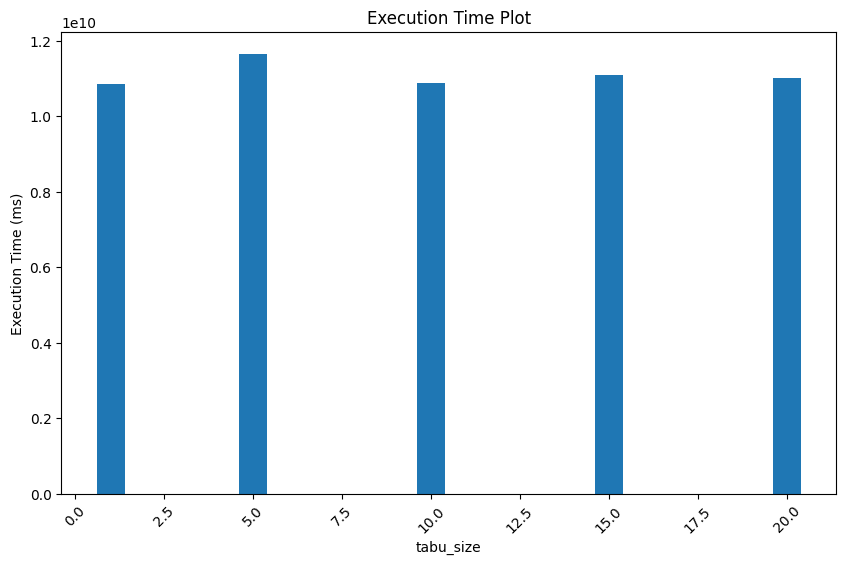

In [18]:
def run_tabu_on_tabuSize(initial_solution, initial_solution_value, initialSolutionWeight,filename,max_iterations,tabu_size_list):
    results = []
    knapsack = read_data(filename)
    for tabu_size in tabu_size_list:
        print(f"Processing {filename}...")
        start_time = time.time_ns()
        best_solution, best_value, best_weight, solutionList = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack, max_iterations, tabu_size)
        execution_time = time.time_ns() - start_time 
        results.append({
            "filename": filename,
            "tabu_size": tabu_size,
            "best_value": best_value,
            "best_weight": best_weight,
            "execution_time": execution_time,
            "solutionsList": solutionList
        })
        print(f"Best value: {best_value}, Best weight: {best_weight}, Time: {execution_time:.2f} ns")
    return results

knapsack = read_data("Data/pi-12-10000-1000-001.kna")

initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack)

results = run_tabu_on_tabuSize(initial_solution, initial_solution_value, initialSolutionWeight,"Data/pi-12-10000-1000-001.kna", 100, [1, 5, 10, 15, 20])

plt.figure(figsize=(10, 6))
filenames = [result["tabu_size"] for result in results]
execution_times = [result["execution_time"] for result in results]
plt.bar(filenames, execution_times)
plt.xlabel("tabu_size")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Time Plot")
plt.xticks(rotation=45)
plt.show()


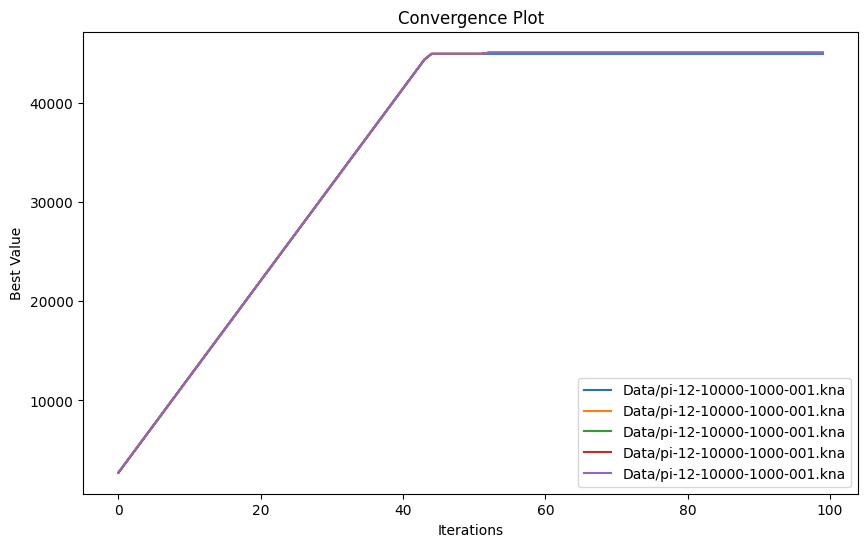

In [19]:
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result["solutionsList"], label=result["filename"])
plt.xlabel("Iterations")
plt.ylabel("Best Value")
plt.title("Convergence Plot")
plt.legend()
plt.show()

In [20]:
# Fonction pour tracer les graphes
def plot_results(results):
    # Graphe de convergence
    plt.figure(figsize=(10, 6))
    for result in results:
        plt.plot(result["solutionsList"], label=result["filename"])
    plt.xlabel("Iterations")
    plt.ylabel("Best Value")
    plt.title("Convergence Plot")
    plt.legend()
    plt.show()

    # Graphe de temps d'exécution
    plt.figure(figsize=(10, 6))
    filenames = [result["filename"] for result in results]
    execution_times = [result["execution_time"] for result in results]
    plt.bar(filenames, execution_times)
    plt.xlabel("Filename")
    plt.ylabel("Execution Time (ms)")
    plt.title("Execution Time Plot")
    plt.xticks(rotation=45)
    plt.show()


Processing Data/pi-12-100-1000-001.kna...
valeur initial 97 poids initial solution 97
Best value: 970, Best weight: 970, Time: 1744619848848692480.00 ms
Processing Data/pi-13-100-1000-001.kna...
valeur initial 0 poids initial solution 0
Best value: 1170, Best weight: 970, Time: 1744619848854456832.00 ms
Processing Data/pi-15-100-1000-001.kna...
valeur initial 738 poids initial solution 737
Best value: 993, Best weight: 988, Time: 1744619848859935744.00 ms


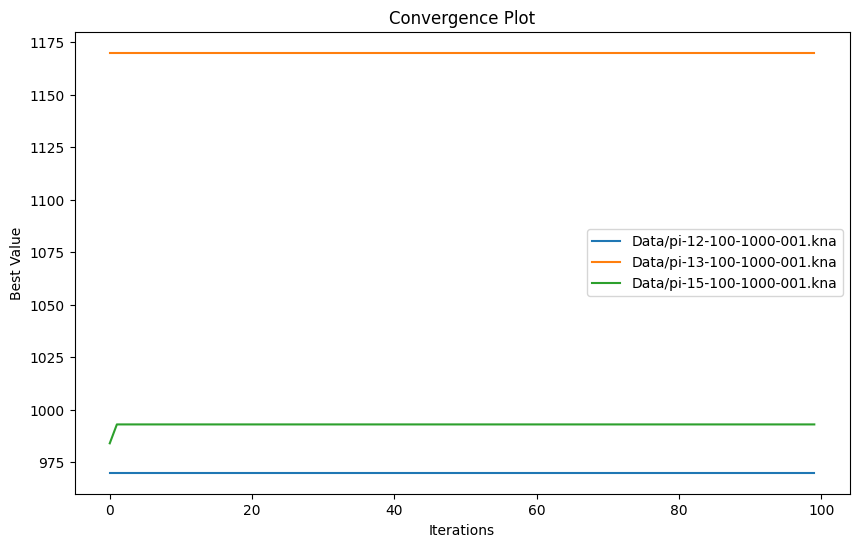

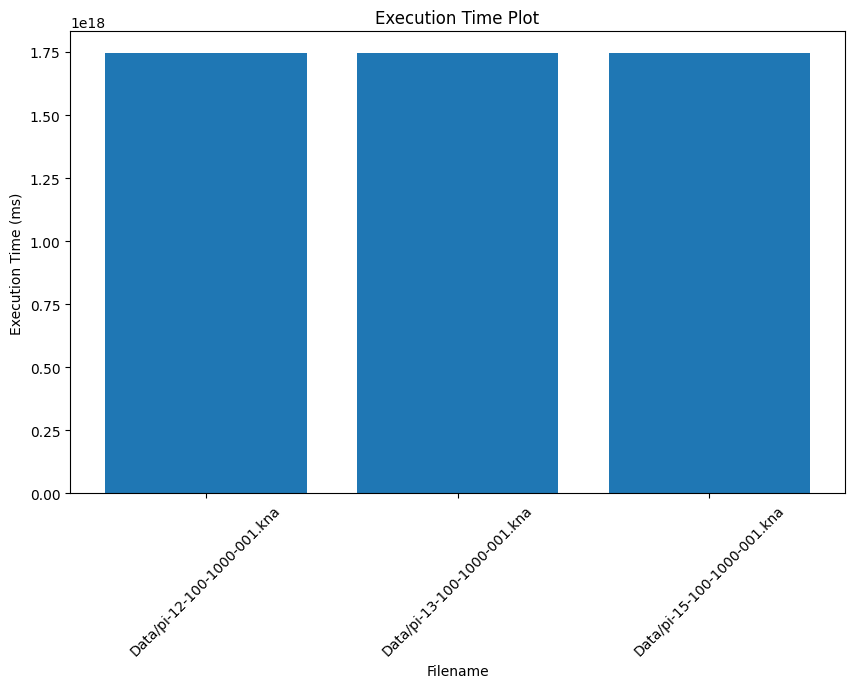

In [21]:
filenames = [
    "Data/pi-12-100-1000-001.kna",
    "Data/pi-13-100-1000-001.kna",
    "Data/pi-15-100-1000-001.kna"
]


max_iterations = 100
tabu_size = 5

results = run_tabu_on_files(filenames, max_iterations, tabu_size)

plot_results(results)

Processing Data/pi-12-1000-1000-001.kna...
valeur initial 0 poids initial solution 0
Best value: 4514, Best weight: 4528, Time: 1744619849262903552.00 ms
Processing Data/pi-13-1000-1000-001.kna...
valeur initial 312 poids initial solution 152
Best value: 4056, Best weight: 3176, Time: 1744619849409592576.00 ms
Processing Data/pi-15-1000-1000-001.kna...
valeur initial 771 poids initial solution 770
Best value: 4830, Best weight: 4816, Time: 1744619849552947456.00 ms


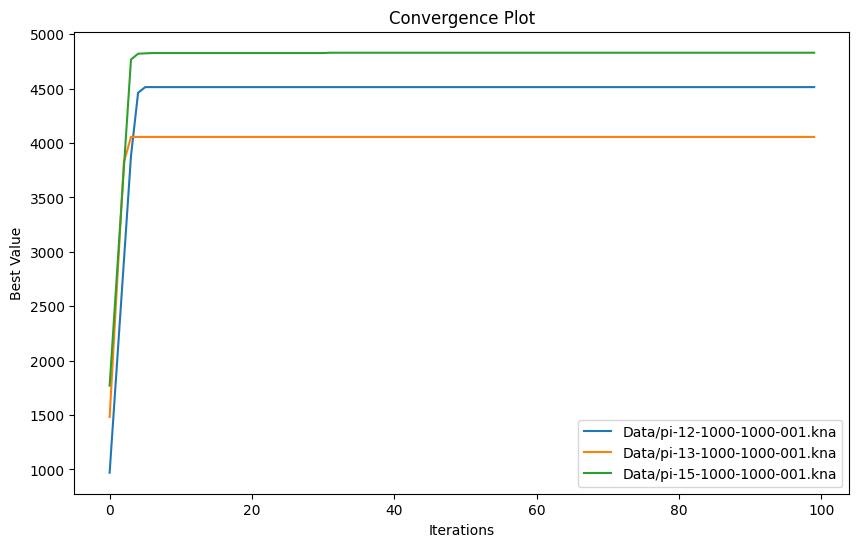

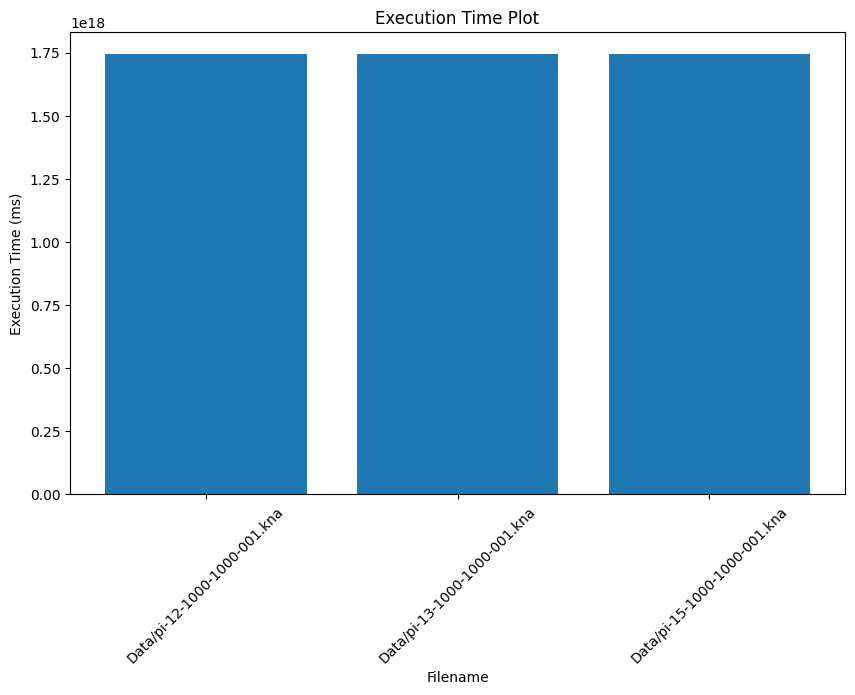

In [22]:
filenames = [
    "Data/pi-12-1000-1000-001.kna",
    "Data/pi-13-1000-1000-001.kna",
    "Data/pi-15-1000-1000-001.kna",
]

max_iterations = 100
tabu_size = 10

results = run_tabu_on_files(filenames, max_iterations, tabu_size)

plot_results(results)


Processing Data/pi-12-10000-1000-001.kna...
valeur initial 3192 poids initial solution 3738
Best value: 45067, Best weight: 45109, Time: 1744619860828493056.00 ms
Processing Data/pi-13-10000-1000-001.kna...
valeur initial 5070 poids initial solution 3830
Best value: 38376, Best weight: 31216, Time: 1744619871883472896.00 ms
Processing Data/pi-15-10000-1000-001.kna...
valeur initial 3801 poids initial solution 3792
Best value: 49368, Best weight: 49297, Time: 1744619883792237568.00 ms


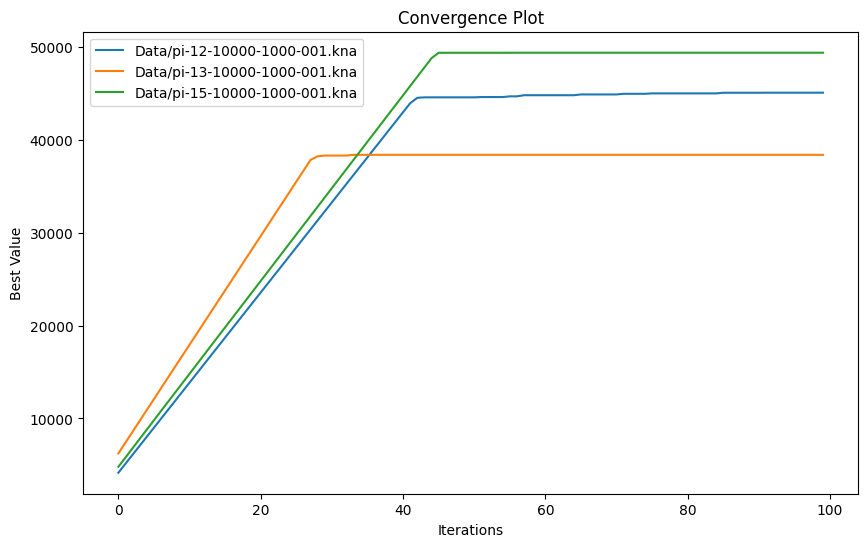

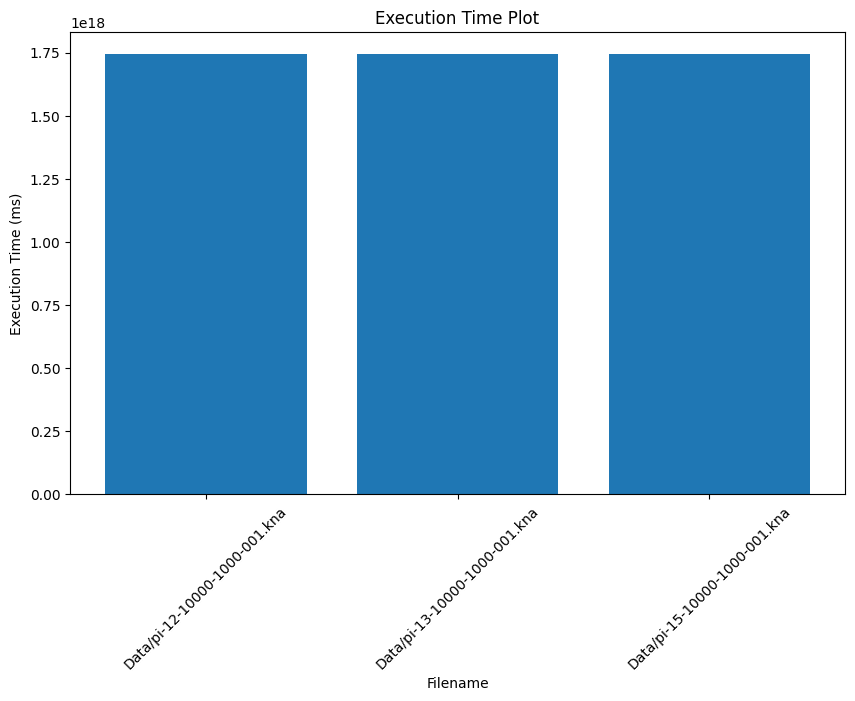

In [23]:
filenames = [
    "Data/pi-12-10000-1000-001.kna",
    "Data/pi-13-10000-1000-001.kna",
    "Data/pi-15-10000-1000-001.kna"
]

max_iterations = 100
tabu_size = 10

# Exécution de la méthode tabou sur tous les fichiers
results = run_tabu_on_files(filenames, max_iterations, tabu_size)

# Tracé des graphes
plot_results(results)

In [24]:
def run_tabu_with_iterations(filenames, iterations_list, tabu_size, optimal_values):
    results = []
    for filename in filenames:
        knapsack = read_data(filename)
        optimal_value = optimal_values[filename]
        initial_solution, initial_solution_value, initialSolutionWeight = generateRandomSolution(knapsack)
        for max_iterations in iterations_list:
            print(f"Processing {filename} with {max_iterations} iterations...")
            start_time = time.time_ns()
            best_solution, best_value, best_weight, _ = tabu_search(initial_solution, initial_solution_value, initialSolutionWeight,knapsack, max_iterations, tabu_size)
            execution_time = (time.time_ns() - start_time) / 1e6  # Temps en millisecondes
            ratio = best_value / optimal_value  # Ratio de performance
            results.append({
                "filename": filename,
                "capacity": knapsack.capacity,
                "max_iterations": max_iterations,
                "best_value": best_value,
                "execution_time": execution_time,
                "ratio": ratio,
            })
    return results

In [25]:
import pandas as pd
import seaborn as sns
def normalize_data(data):
    min_val = min(data)
    max_val = max(data)
    if max_val == min_val:
        return [0.0 for _ in data]  # Retourne une liste de zéros si toutes les valeurs sont identiques
    return [(x - min_val) / (max_val - min_val) for x in data]
def plot_progression_heatmap(results,title):
    # Convertir en DataFrame et trier
    df = pd.DataFrame(results).sort_values(['filename', 'max_iterations'])
    
    # Calculer la progression entre les itérations
    df['progression'] = df.groupby('filename')['best_value'].diff().fillna(0)
    
    # Marquer les stagnations (progression = 0)
    df['stagnation'] = df['progression'] == 0
    
    # Préparer la table pivot
    pivot_prog = df.pivot(index="filename", 
                         columns="max_iterations", 
                         values="progression")
    
    pivot_time = df.pivot(index="filename",
                         columns="max_iterations", 
                         values="execution_time")
    
    # Créer une annotation combinée
    annotations = (pivot_prog.round(2).astype(str) + " (" + 
                  pivot_time.round(2).astype(str) + "ms)")
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        pivot_prog,
        annot=annotations,
        fmt="",
        cmap="RdYlGn",
        center=0,
        linewidths=0.5,
        cbar_kws={"label": "Amélioration de la solution"},
    )
    
    plt.title(title, 
             pad=20)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Fichier")
    plt.tight_layout()
    plt.show()

valeur initial 520 poids initial solution 660
Processing Data/pi-12-100-1000-001.kna with 1 iterations...
Processing Data/pi-12-100-1000-001.kna with 2 iterations...
Processing Data/pi-12-100-1000-001.kna with 5 iterations...
Processing Data/pi-12-100-1000-001.kna with 8 iterations...
Processing Data/pi-12-100-1000-001.kna with 10 iterations...
Processing Data/pi-12-100-1000-001.kna with 20 iterations...
valeur initial 156 poids initial solution 76
Processing Data/pi-13-100-1000-001.kna with 1 iterations...
Processing Data/pi-13-100-1000-001.kna with 2 iterations...
Processing Data/pi-13-100-1000-001.kna with 5 iterations...
Processing Data/pi-13-100-1000-001.kna with 8 iterations...
Processing Data/pi-13-100-1000-001.kna with 10 iterations...
Processing Data/pi-13-100-1000-001.kna with 20 iterations...
valeur initial 720 poids initial solution 720
Processing Data/pi-15-100-1000-001.kna with 1 iterations...
Processing Data/pi-15-100-1000-001.kna with 2 iterations...
Processing Data/pi-

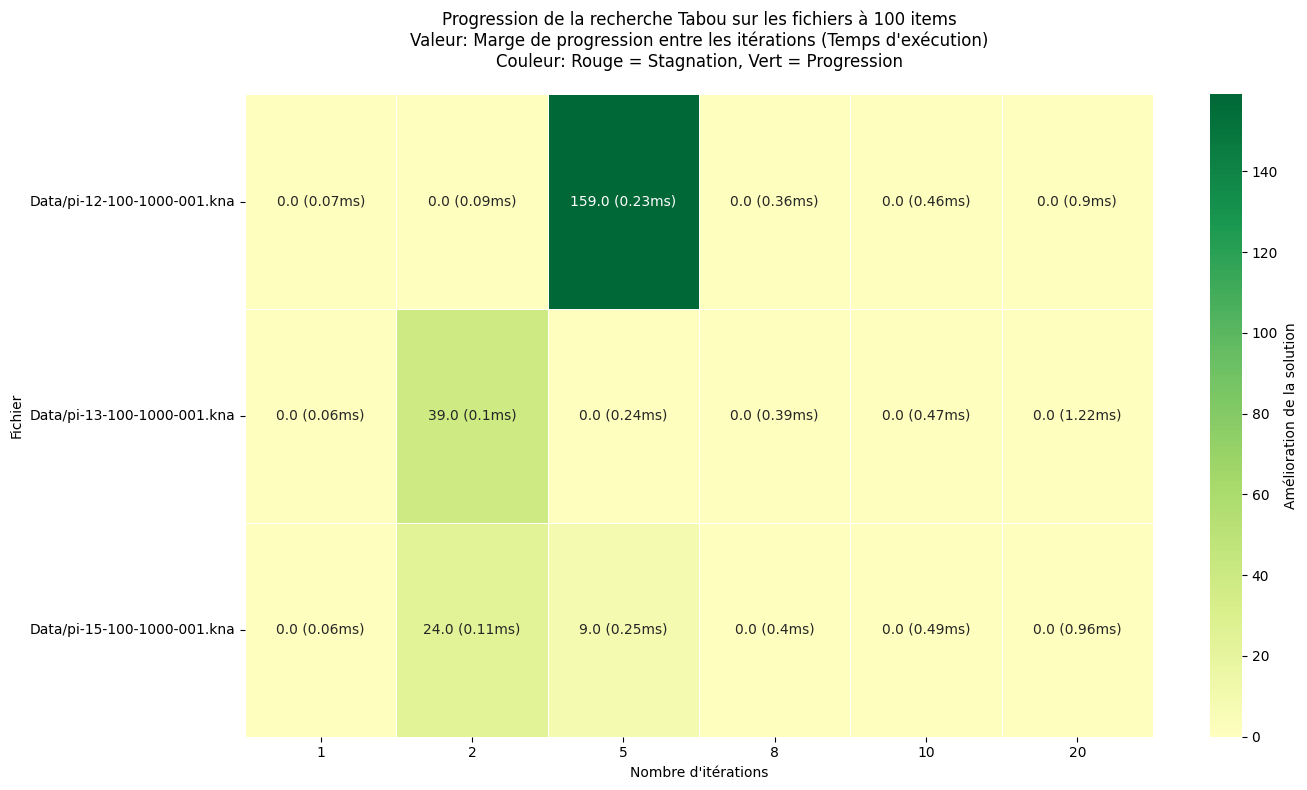

In [38]:

filenames_100Item = [
    "Data/pi-12-100-1000-001.kna",
    "Data/pi-13-100-1000-001.kna",
    "Data/pi-15-100-1000-001.kna"
]

optimal_values = {
    "Data/pi-12-100-1000-001.kna": 970,
    "Data/pi-13-100-1000-001.kna": 970,
    "Data/pi-15-100-1000-001.kna": 970,
    "Data/pi-12-1000-1000-001.kna": 4514,
    "Data/pi-13-1000-1000-001.kna": 3118,
    "Data/pi-15-1000-1000-001.kna": 4753,
    "Data/pi-12-10000-1000-001.kna": 45105,
    "Data/pi-13-10000-1000-001.kna": 31234,
    "Data/pi-15-10000-1000-001.kna": 49276,
}


iterations_list = [1, 2, 5, 8, 10,20] 
tabu_size = 10

results100 = run_tabu_with_iterations(filenames_100Item, iterations_list, tabu_size, optimal_values)


print("Résultats :")
for result in results100:
    print(f"Fichier: {result['filename']}, Itérations: {result['max_iterations']}, "
          f"Best Value: {result['best_value']}, Temps: {result['execution_time']:.2f} ms, "
          f"Ratio: {result['ratio']:.2f}")

plot_progression_heatmap(results100 , "Progression de la recherche Tabou sur les fichiers à 100 items\n" +
             "Valeur: Marge de progression entre les itérations (Temps d'exécution)\n" +
             "Couleur: Rouge = Stagnation, Vert = Progression")

valeur initial 728 poids initial solution 924
Processing Data/pi-12-1000-1000-001.kna with 1 iterations...
Processing Data/pi-12-1000-1000-001.kna with 5 iterations...
Processing Data/pi-12-1000-1000-001.kna with 10 iterations...
Processing Data/pi-12-1000-1000-001.kna with 15 iterations...
Processing Data/pi-12-1000-1000-001.kna with 20 iterations...
Processing Data/pi-12-1000-1000-001.kna with 50 iterations...
Processing Data/pi-12-1000-1000-001.kna with 100 iterations...
valeur initial 234 poids initial solution 194
Processing Data/pi-13-1000-1000-001.kna with 1 iterations...
Processing Data/pi-13-1000-1000-001.kna with 5 iterations...
Processing Data/pi-13-1000-1000-001.kna with 10 iterations...
Processing Data/pi-13-1000-1000-001.kna with 15 iterations...
Processing Data/pi-13-1000-1000-001.kna with 20 iterations...
Processing Data/pi-13-1000-1000-001.kna with 50 iterations...
Processing Data/pi-13-1000-1000-001.kna with 100 iterations...
valeur initial 468 poids initial solution 

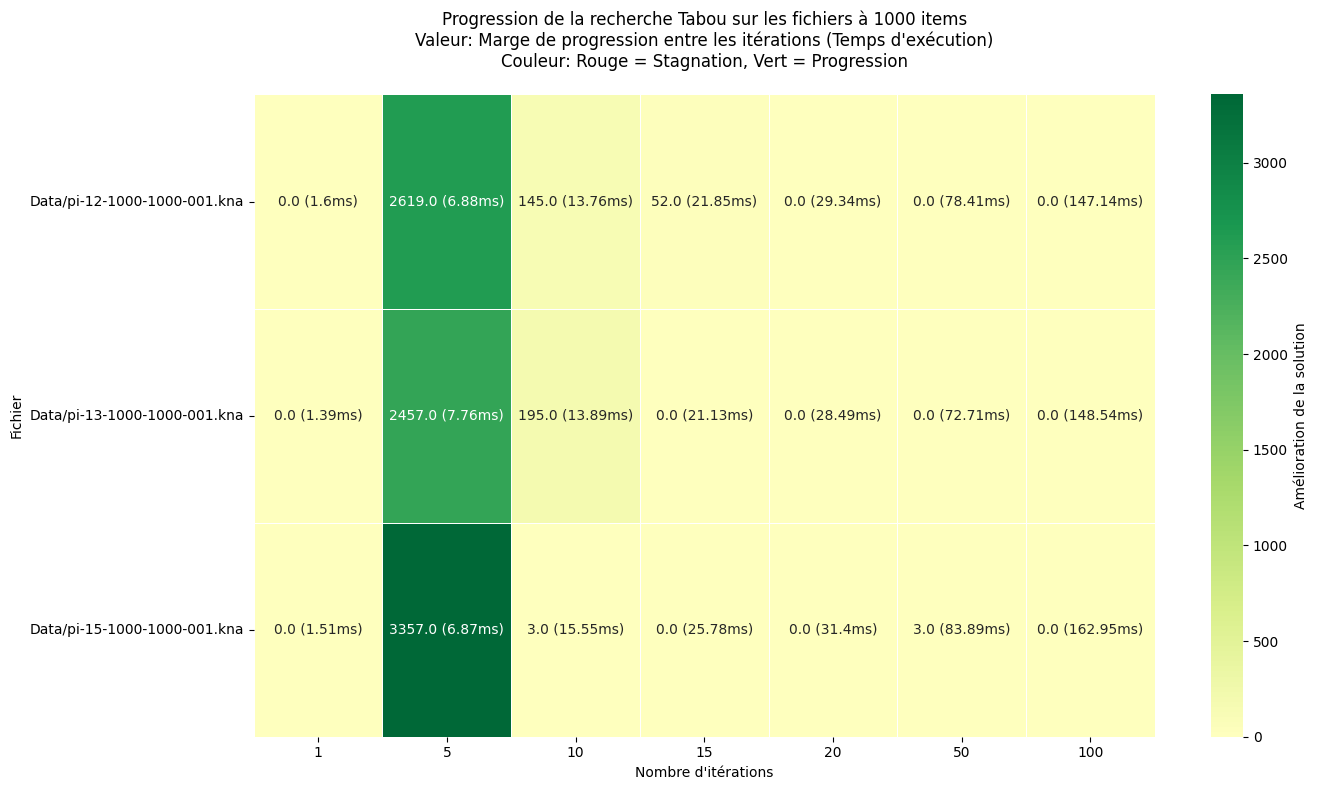

In [27]:
filenames_1000Item = [
    "Data/pi-12-1000-1000-001.kna",
    "Data/pi-13-1000-1000-001.kna",
    "Data/pi-15-1000-1000-001.kna"]

iterations_list = [1, 5, 10, 15, 20, 50,100] 

# Exécution des tests
results1000 = run_tabu_with_iterations(filenames_1000Item, iterations_list, tabu_size, optimal_values)

# Affichage des résultats
print("Résultats :")
for result in results1000:
    print(f"Fichier: {result['filename']}, Itérations: {result['max_iterations']}, "
          f"Best Value: {result['best_value']}, Temps: {result['execution_time']:.2f} ms, "
          f"Ratio: {result['ratio']:.2f}")
    
# Heatmap combinée
plot_progression_heatmap(results1000, "Progression de la recherche Tabou sur les fichiers à 1000 items\n" +
             "Valeur: Marge de progression entre les itérations (Temps d'exécution)\n" +
             "Couleur: Rouge = Stagnation, Vert = Progression")

valeur initial 3770 poids initial solution 4106
Processing Data/pi-12-10000-1000-001.kna with 5 iterations...
Processing Data/pi-12-10000-1000-001.kna with 10 iterations...
Processing Data/pi-12-10000-1000-001.kna with 15 iterations...
Processing Data/pi-12-10000-1000-001.kna with 20 iterations...
Processing Data/pi-12-10000-1000-001.kna with 50 iterations...
Processing Data/pi-12-10000-1000-001.kna with 100 iterations...
valeur initial 3276 poids initial solution 2316
Processing Data/pi-13-10000-1000-001.kna with 5 iterations...
Processing Data/pi-13-10000-1000-001.kna with 10 iterations...
Processing Data/pi-13-10000-1000-001.kna with 15 iterations...
Processing Data/pi-13-10000-1000-001.kna with 20 iterations...
Processing Data/pi-13-10000-1000-001.kna with 50 iterations...
Processing Data/pi-13-10000-1000-001.kna with 100 iterations...
valeur initial 7851 poids initial solution 7835
Processing Data/pi-15-10000-1000-001.kna with 5 iterations...
Processing Data/pi-15-10000-1000-001.k

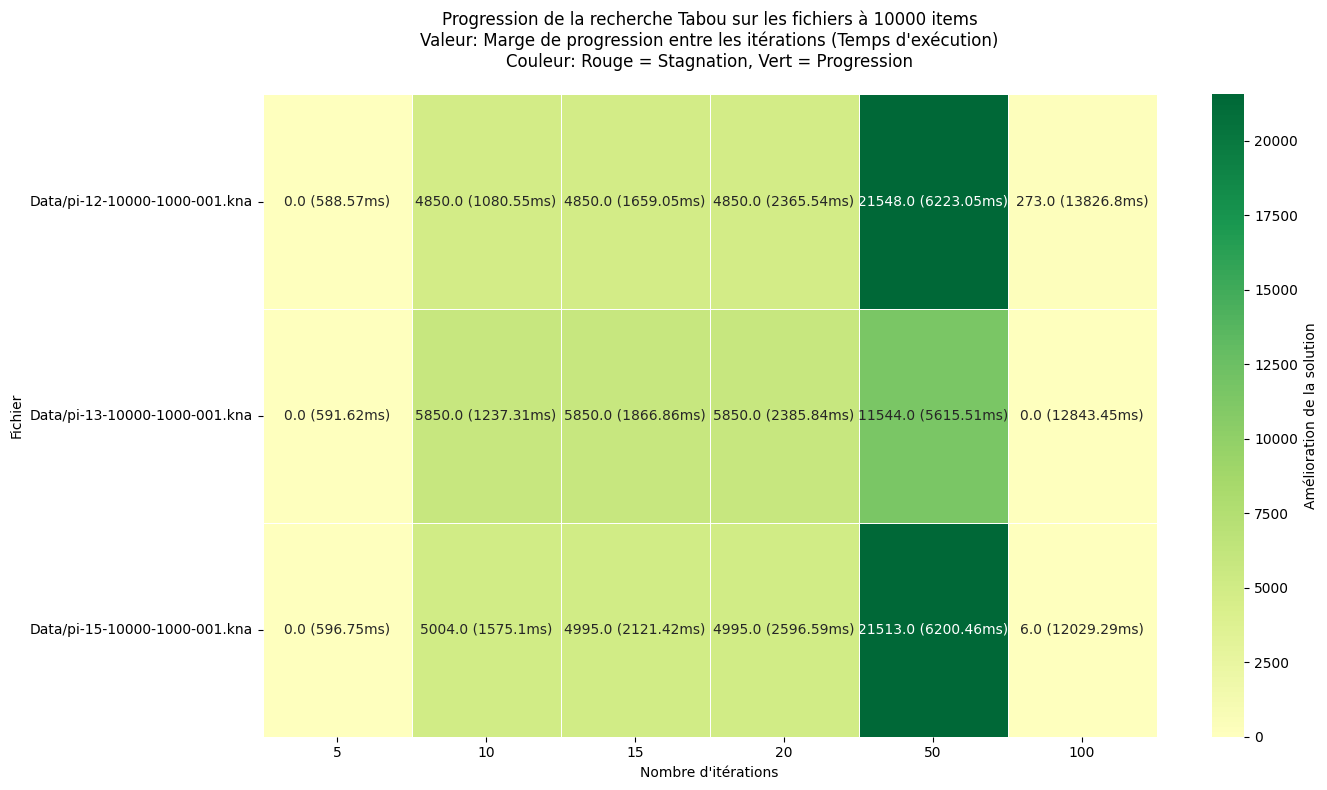

In [28]:
filenames_10000Item = [
    "Data/pi-12-10000-1000-001.kna",
    "Data/pi-13-10000-1000-001.kna",
    "Data/pi-15-10000-1000-001.kna"
]
iterations_list = [5, 10, 15, 20, 50,100] 

results10000 = run_tabu_with_iterations(filenames_10000Item, iterations_list, tabu_size, optimal_values)


print("Résultats :")
for result in results10000:
    print(f"Fichier: {result['filename']}, Itérations: {result['max_iterations']}, "
          f"Best Value: {result['best_value']}, Temps: {result['execution_time']:.2f} ms, "
          f"Ratio: {result['ratio']:.2f}")

plot_progression_heatmap(results10000, "Progression de la recherche Tabou sur les fichiers à 10000 items\n" +
             "Valeur: Marge de progression entre les itérations (Temps d'exécution)\n" +
             "Couleur: Rouge = Stagnation, Vert = Progression")

valeur initial 1743 poids initial solution 1925
valeur initial 6708 poids initial solution 5148
valeur initial 5664 poids initial solution 5651
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

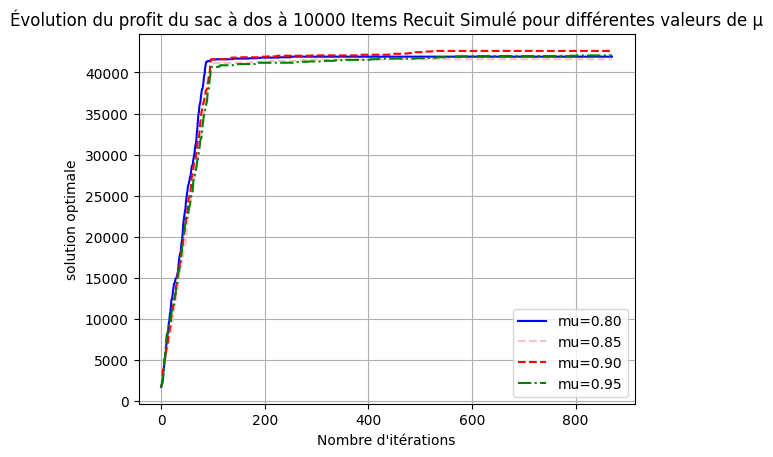

In [29]:
knapsack1 = read_data("Data/pi-12-10000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-10000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.80)
print("Best solution :", best_solution1)
print("Best value pi-12:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.85)
print("Best solution :", best_solution0)
print("Best value pi-12:", best_value0)
print("weight1:", weight0)

best_solution2, best_value2, weight2,solutionsList2 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.9)
print("Best solution :", best_solution2)
print("Best value pi-12:", best_value2)
print("weight1:", weight2)

best_solution3, best_value3, weight3,solutionsList3 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.95)
print("Best solution :", best_solution3)
print("Best value pi-12:", best_value3)
print("weight1:", weight3)

# print("Best value pi-13:", best_value13)
# print("weight2:", weight2)

# print("Best value pi-15:", best_value15)
# print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="mu=0.80")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='pink', label="mu=0.85")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="mu=0.90")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="mu=0.95")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items Recuit Simulé pour différentes valeurs de μ")
plt.legend()
plt.grid()
plt.show()


valeur initial 0 poids initial solution 0
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]
Best value pi-13: 1989
weight1: 969
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

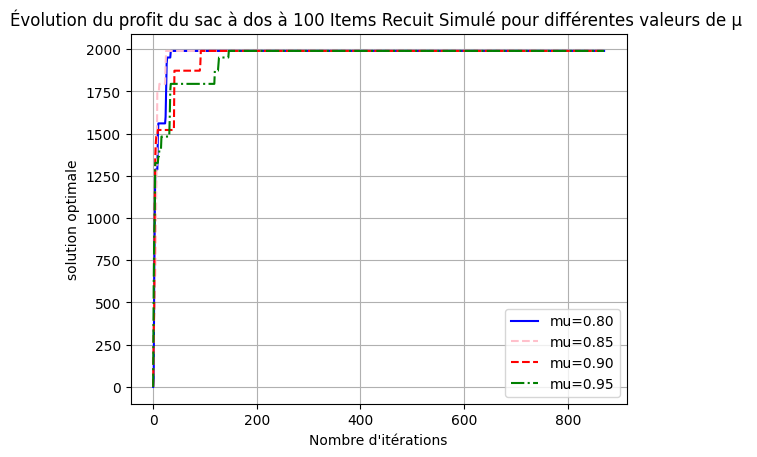

In [30]:
knapsack1 = read_data("Data/pi-13-100-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.80)
print("Best solution :", best_solution1)
print("Best value pi-13:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.85)
print("Best solution :", best_solution0)
print("Best value pi-13:", best_value0)
print("weight1:", weight0)

best_solution2, best_value2, weight2,solutionsList2 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.9)
print("Best solution :", best_solution2)
print("Best value pi-13:", best_value2)
print("weight1:", weight2)

best_solution3, best_value3, weight3,solutionsList3 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.95)
print("Best solution :", best_solution3)
print("Best value pi-13:", best_value3)
print("weight1:", weight3)



plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="mu=0.80")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='pink', label="mu=0.85")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="mu=0.90")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="mu=0.95")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 100 Items Recuit Simulé pour différentes valeurs de μ ")
plt.legend()
plt.grid()
plt.show()


valeur initial 5655 poids initial solution 4155
valeur initial 4563 poids initial solution 3543
valeur initial 5853 poids initial solution 5835
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

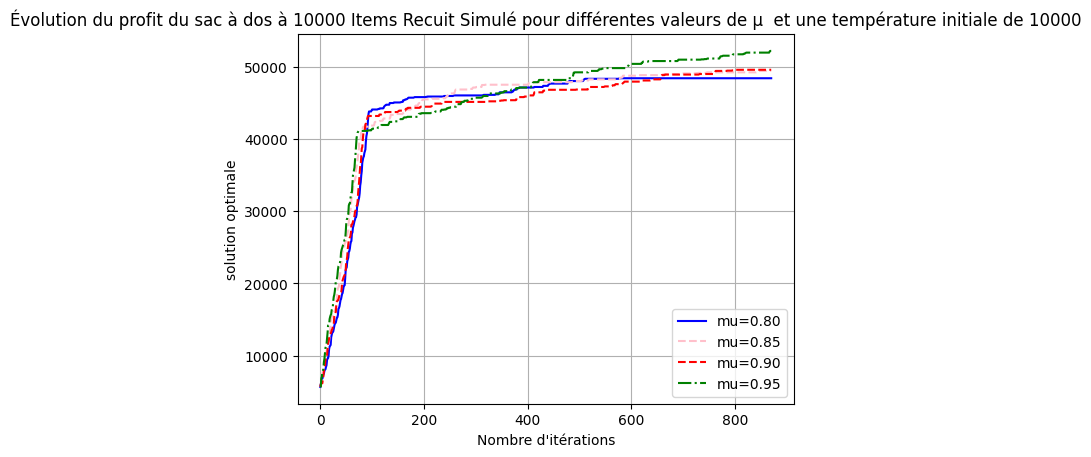

In [47]:
knapsack1 = read_data("Data/pi-13-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,10000,30,30,0.80)
print("Best solution :", best_solution1)
print("Best value pi-13:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,10000,30,30,0.85)
print("Best solution :", best_solution0)
print("Best value pi-13:", best_value0)
print("weight1:", weight0)

best_solution2, best_value2, weight2,solutionsList2 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,10000,30,30,0.9)
print("Best solution :", best_solution2)
print("Best value pi-13:", best_value2)
print("weight1:", weight2)

best_solution3, best_value3, weight3,solutionsList3 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,10000,30,30,0.95)
print("Best solution :", best_solution3)
print("Best value pi-13:", best_value3)
print("weight1:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="mu=0.80")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='pink', label="mu=0.85")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="mu=0.90")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="mu=0.95")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items Recuit Simulé pour différentes valeurs de μ  et une température initiale de 10000")
plt.legend()
plt.grid()
plt.show()


valeur initial 4017 poids initial solution 2677
valeur initial 4797 poids initial solution 3537
valeur initial 5202 poids initial solution 5188
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

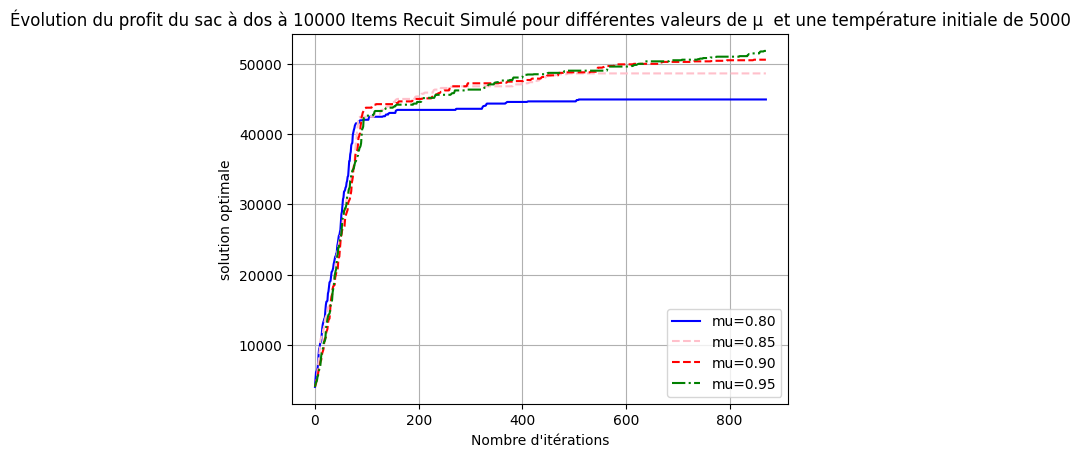

In [32]:
knapsack1 = read_data("Data/pi-13-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,5000,30,30,0.80)
print("Best solution :", best_solution1)
print("Best value pi-13:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,5000,30,30,0.85)
print("Best solution :", best_solution0)
print("Best value pi-13:", best_value0)
print("weight1:", weight0)

best_solution2, best_value2, weight2,solutionsList2 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,5000,30,30,0.9)
print("Best solution :", best_solution2)
print("Best value pi-13:", best_value2)
print("weight1:", weight2)

best_solution3, best_value3, weight3,solutionsList3 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,5000,30,30,0.95)
print("Best solution :", best_solution3)
print("Best value pi-13:", best_value3)
print("weight1:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="mu=0.80")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='pink', label="mu=0.85")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="mu=0.90")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="mu=0.95")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items Recuit Simulé pour différentes valeurs de μ  et une température initiale de 5000")
plt.legend()
plt.grid()
plt.show()


valeur initial 3822 poids initial solution 3022
valeur initial 9672 poids initial solution 7392
valeur initial 4302 poids initial solution 4289
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

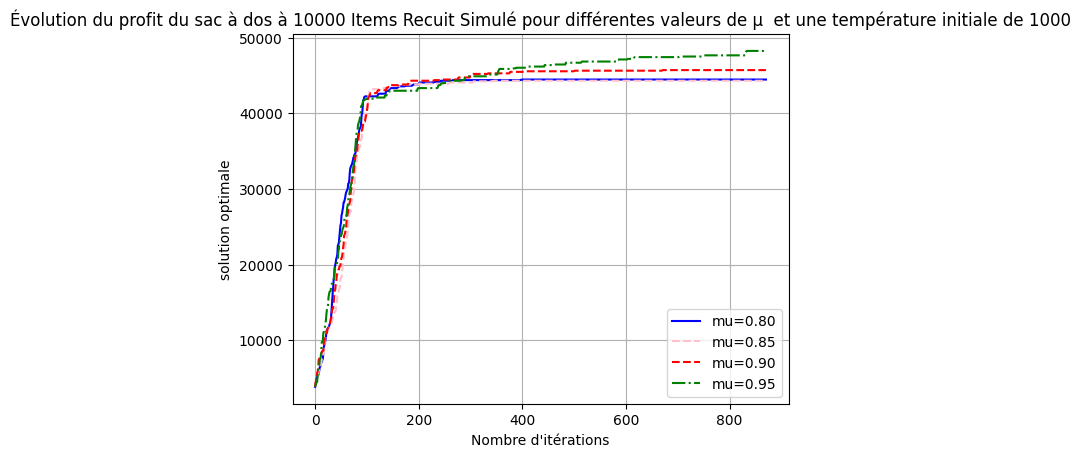

In [33]:
knapsack1 = read_data("Data/pi-13-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)
initial_solution2, initial_solution_value2, initialSolutionWeight2 = generateRandomSolution(knapsack2)
initial_solution3, initial_solution_value3, initialSolutionWeight3 = generateRandomSolution(knapsack3)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.80)
print("Best solution :", best_solution1)
print("Best value pi-13:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.85)
print("Best solution :", best_solution0)
print("Best value pi-13:", best_value0)
print("weight1:", weight0)

best_solution2, best_value2, weight2,solutionsList2 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.9)
print("Best solution :", best_solution2)
print("Best value pi-13:", best_value2)
print("weight1:", weight2)

best_solution3, best_value3, weight3,solutionsList3 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,30,30,0.95)
print("Best solution :", best_solution3)
print("Best value pi-13:", best_value3)
print("weight1:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="mu=0.80")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='pink', label="mu=0.85")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="mu=0.90")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="mu=0.95")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items Recuit Simulé pour différentes valeurs de μ  et une température initiale de 1000")
plt.legend()
plt.grid()
plt.show()


valeur initial 5811 poids initial solution 3911
sol :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

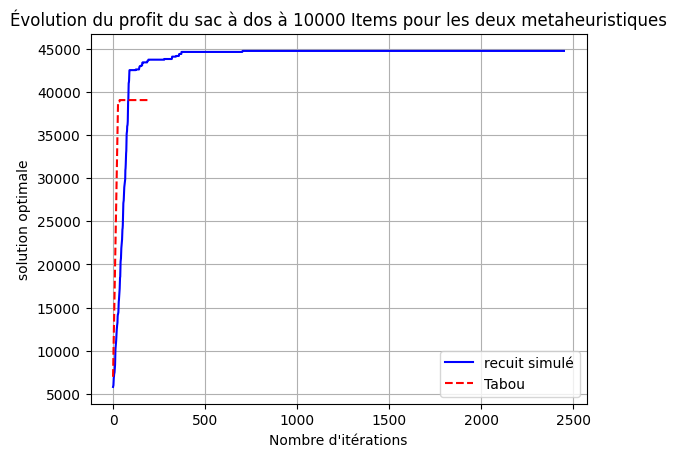

In [34]:
knapsack1 = read_data("Data/pi-13-10000-1000-001.kna")

initial_solution1, initial_solution_value1, initialSolutionWeight1 = generateRandomSolution(knapsack1)

best_solution1, best_value1, weight1,solutionsList1 = recuit_simule(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,1000,50,50,0.80)
print("Best solution recuit simulé:", best_solution1)
print("Best value pi-13 recuit simulé:", best_value1)
print("weight1:", weight1)

best_solution0, best_value0, weight0,solutionsList0 = tabu_search(initial_solution1, initial_solution_value1, initialSolutionWeight1,knapsack1,200,20)
print("Best solution tabou:", best_solution0)
print("Best value pi-13 tabou:", best_value0)
print("weight1:", weight0)



plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="recuit simulé")
plt.plot(range(len(solutionsList0)), solutionsList0, linestyle='--', color='r', label="Tabou")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos à 10000 Items pour les deux metaheuristiques")
plt.legend()
plt.grid()
plt.show()
